In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# loading data
df = pd.read_excel(r"E:\Xebia\xebia_training_data\datasets\Wholesale customers data.xlsx")
df.shape

(440, 8)

## Data Exploration

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

## Data Cleaning

In [10]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df = df[df.Fresh<df.Fresh.quantile(0.99)]
print(df.shape)
df.skew()

(435, 8)


Channel              0.742849
Region              -1.281134
Fresh                1.445511
Milk                 4.122928
Grocery              3.594848
Frozen               6.236876
Detergents_Paper     3.615681
Delicassen          11.349132
dtype: float64

In [9]:
df = df[df.Milk<df.Milk.quantile(0.99)]
print(df.shape)
df.skew()

(430, 8)


Channel             0.769855
Region             -1.263375
Fresh               1.478508
Milk                2.175543
Grocery             2.484004
Frozen              6.564497
Detergents_Paper    3.211174
Delicassen          4.433185
dtype: float64

### Clustering on two features

In [11]:
df2 = df[['Fresh','Milk']]

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2)

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5,verbose=True)

In [19]:
model.fit(df3)

Initialization complete
Iteration 0, inertia 499.2822208792877
Iteration 1, inertia 392.4856872735605
Iteration 2, inertia 352.8725970770853
Iteration 3, inertia 337.3811293485196
Iteration 4, inertia 332.06832162137414
Iteration 5, inertia 328.50487967595103
Iteration 6, inertia 327.2996235173168
Iteration 7, inertia 326.1070920780729
Iteration 8, inertia 325.27237003508037
Iteration 9, inertia 323.7621379094584
Iteration 10, inertia 322.3081644979446
Iteration 11, inertia 321.7145934047024
Iteration 12, inertia 321.54712687565507
Iteration 13, inertia 321.3784438700311
Iteration 14, inertia 321.3381581621964
Converged at iteration 14: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 470.0022629134936
Iteration 1, inertia 330.8011215001939
Iteration 2, inertia 324.68595697673527
Iteration 3, inertia 323.20279226561104
Iteration 4, inertia 322.3309762054995
Iteration 5, inertia 321.60055051396785
Iteration 6, inertia 321.4668563085714

KMeans(n_clusters=3, random_state=5, verbose=True)

In [15]:
print(model.cluster_centers_)

[[-0.50598913  1.91649466]
 [-0.45739985 -0.34709627]
 [ 1.4251351  -0.1989875 ]]


In [16]:
pd.DataFrame(model.cluster_centers_,columns=df2.columns)

,Fresh,Milk
0,-0.505989,1.916495
1,-0.457400,-0.347096
2,1.425135,-0.198987


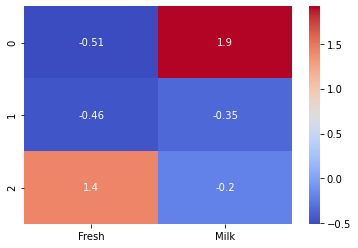

In [17]:
sns.heatmap(pd.DataFrame(model.cluster_centers_,columns=df2.columns),annot=True,cmap='coolwarm')
plt.show()

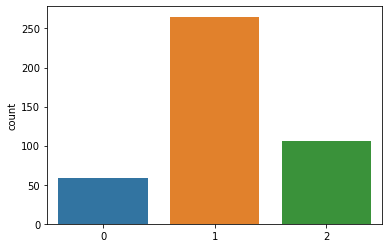

In [20]:
sns.countplot(model.labels_)
plt.show()

### Clustering for 4 features

In [21]:
df4 = df[['Fresh','Milk','Frozen','Grocery']]
df5 = sc.fit_transform(df4)

model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df5)

KMeans(n_clusters=3, random_state=5)

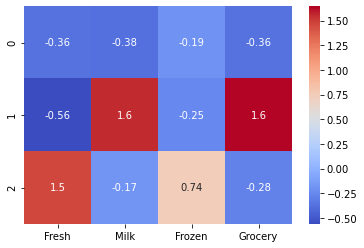

In [23]:
sns.heatmap(pd.DataFrame(model2.cluster_centers_,columns=df4.columns),annot=True,cmap='coolwarm')
plt.show()

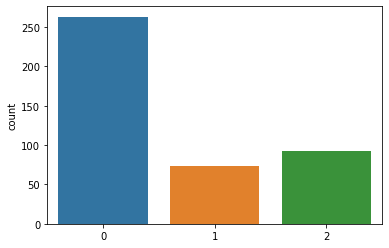

In [24]:
sns.countplot(model2.labels_)
plt.show()

# Elbow Methods to get best value of k

In [25]:
k = []
inertia = []
for i in range(1,12):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df5)
    k.append(i)
    inertia.append(model.inertia_)

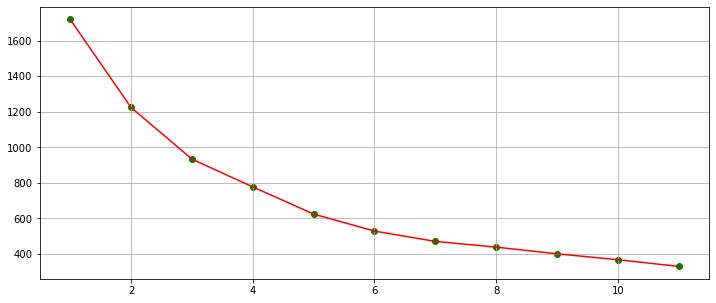

In [27]:
plt.figure(figsize=(12,5))
plt.scatter(k,inertia,c='g')
plt.plot(k,inertia,c='r')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering